In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from utils import img_collection as icoll
import numpy as np
from bson.objectid import ObjectId

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
#from IPython.display import display, Image
import random


%matplotlib inline

In [2]:
poolId = '581645620310e906e31b07ba'
poolIdObj = ObjectId(poolId)
targets = []
features = []
for i, r in enumerate(icoll.getPoolUrlsIterator(poolId)):
    if 'slices' not in r:
        continue
    targets.append([desc for desc in r['pools'] if desc['poolId'] == poolIdObj][0]['target'])
    features.append(r['slices']['bowSift100']['features'])


In [26]:
poolId = '581645620310e906e31b07ba'
poolIdObj = ObjectId(poolId)
targets = []
features = []
for i, r in enumerate(icoll.getPoolUrlsIterator(poolId)):
    if 'slices' not in r:
        continue
    targets.append([desc for desc in r['pools'] if desc['poolId'] == poolIdObj][0]['target'])
    features.append((r['path'], r['slices']['bowSift100']['features']))


In [3]:
len(targets), sum(targets)

(1034, 182)

In [29]:
X_train_ext, X_test_ext, y_train, y_test = train_test_split(features, targets, test_size=0.33)
X_train = [x[1] for x in X_train_ext]
X_test = [x[1] for x in X_test_ext]

In [31]:
clf = svm.SVC(kernel='rbf', C=128).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8771929824561403

In [6]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [11]:
precision_score(clf.predict(X_test), y_test)

0.43548387096774194

In [12]:
def perf_measure(y_actual, y_hat):
    CM = confusion_matrix(y_test, clf.predict(X_test))
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    return(TP, FP, TN, FN)

In [13]:
perf_measure(y_test, clf.predict(X_test))

(27, 6, 274, 35)

In [30]:
for i in range(0,150):
    C = 2**(i/10.)
    clf = svm.SVC(kernel='rbf', C=C).fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    precision = precision_score(y_hat, y_test)
    TP, FP, TN, FN = perf_measure(y_test, y_hat)
    print '\t'.join(map(str, [C, score, precision, TP, FP, TN, FN]))

1.0	0.853801169591	0.246153846154	16	1	276	49
1.07177346254	0.862573099415	0.292307692308	19	1	276	46
1.148698355	0.868421052632	0.323076923077	21	1	276	44
1.23114441334	0.868421052632	0.323076923077	21	1	276	44
1.31950791077	0.868421052632	0.323076923077	21	1	276	44
1.41421356237	0.868421052632	0.323076923077	21	1	276	44
1.51571656651	0.868421052632	0.338461538462	22	2	275	43
1.62450479271	0.874269005848	0.369230769231	24	2	275	41
1.74110112659	0.883040935673	0.415384615385	27	2	275	38
1.86606598307	0.883040935673	0.415384615385	27	2	275	38
2.0	0.885964912281	0.430769230769	28	2	275	37
2.14354692507	0.891812865497	0.461538461538	30	2	275	35
2.29739670999	0.888888888889	0.461538461538	30	3	274	35
2.46228882669	0.888888888889	0.461538461538	30	3	274	35
2.63901582155	0.888888888889	0.461538461538	30	3	274	35
2.82842712475	0.888888888889	0.461538461538	30	3	274	35
3.03143313302	0.888888888889	0.461538461538	30	3	274	35
3.24900958542	0.888888888889	0.461538461538	30	3	274	35
3.48220225318	

In [32]:
clf = svm.SVC(kernel='rbf', C=128).fit(X_train, y_train)
y_hat = clf.predict(X_test)


In [92]:
FPs = np.logical_and(np.logical_not(np.array(y_test, dtype=bool)), np.array(y_hat, dtype=bool))
FNs = np.logical_and(np.array(y_test, dtype=bool), np.logical_not(np.array(y_hat, dtype=bool)))

print "FPs"
for i in range(len(X_test)):
    if FPs[i]:
        print X_test_ext[i][0]
        #pil_im = Image.open(X_test_ext[i][0], 'r')
        #imshow(np.asarray(pil_im))
        #plt.imshow(pil_im)

print 
print "FNs"
for i in range(len(X_test)):
    if FNs[i]:
        print X_test_ext[i][0]
        X_test_ext[i][0]


FPs
/Users/khaxis/workspace/image_tags/data/images/n04059516_8556
/Users/khaxis/workspace/image_tags/data/images/n09828216_28461
/Users/khaxis/workspace/image_tags/data/images/n01839330_1579
/Users/khaxis/workspace/image_tags/data/images/n02738978_9751
/Users/khaxis/workspace/image_tags/data/images/n09443641_11498
/Users/khaxis/workspace/image_tags/data/images/n11698245_768
/Users/khaxis/workspace/image_tags/data/images/n11536673_5305
/Users/khaxis/workspace/image_tags/data/images/n11686912_4790
/Users/khaxis/workspace/image_tags/data/images/n01564773_8613
/Users/khaxis/workspace/image_tags/data/images/n13083023_8274
/Users/khaxis/workspace/image_tags/data/images/n02077152_2910
/Users/khaxis/workspace/image_tags/data/images/n01443243_1533
/Users/khaxis/workspace/image_tags/data/images/n01835276_9208
/Users/khaxis/workspace/image_tags/data/images/n01647303_1007
/Users/khaxis/workspace/image_tags/data/images/n09451237_8408
/Users/khaxis/workspace/image_tags/data/images/n10577820_458
/Use

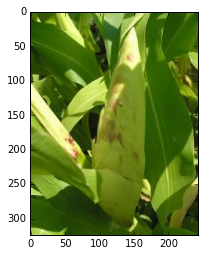

In [105]:
pil_im = Image.open('/Users/khaxis/workspace/image_tags/data/images/n12144987_306', 'r')
imshow(np.asarray(pil_im))

In [3]:
poolId = '581645620310e906e31b07ba'
poolIdObj = ObjectId(poolId)
for i, row in enumerate(icoll.getPoolUrlsIterator(poolId)):
    
    print [p for p in row['pools'] if p['poolId'] == poolIdObj][0]
    
    if i>3:
        break

{u'target': 0, u'poolId': ObjectId('581645620310e906e31b07ba')}
{u'target': 0, u'poolId': ObjectId('581645620310e906e31b07ba')}
{u'target': 0, u'poolId': ObjectId('581645620310e906e31b07ba')}
{u'target': 0, u'poolId': ObjectId('581645620310e906e31b07ba')}
{u'target': 0, u'poolId': ObjectId('581645620310e906e31b07ba')}


In [4]:
test_size = 0.30
newPoolId = icoll.makePool("n00017222 classification pool")
print "Pool created with ID: %s\n" % newPoolId
for i, row in enumerate(icoll.getPoolUrlsIterator(poolId)):
    in_train_set = random.random() > test_size
    target = [p for p in row['pools'] if p['poolId'] == poolIdObj][0][u'target'] # find first occurence in the previous pool
    icoll.assignToPool(row, newPoolId, target, in_train_set)

Pool created with ID: 5856d91e0310e928ae13567f



In [10]:
str(poolIdObj) == poolId

True

In [8]:
poolId

'581645620310e906e31b07ba'